In [1014]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp
from scipy import stats
from statsmodels.formula.api import ols

In [1015]:
# read the PV data from excel into a pandas DataFrame, choose only zipcode, system size, and yearly solar production
total_pv = pd.read_csv('Datasets/openpv-export-CA.csv', usecols = ['zipcode','size_kw','install_type']) #include annual pv prod. column?
#total_pv

# removing all row elements with Na/NaN
clean_pv1 = total_pv.dropna(subset=['install_type'])

# filtering out all non-residential pv entries 
clean_pv2 = clean_pv1[clean_pv1['install_type'].str.contains("esidential")] 
clean_pv3 = clean_pv2.replace({'Residential':'residential'})

# sorting pv data by zipcode and summing total amount of solar (kW) in each zipcode, removing zero-production lines
pv = clean_pv3.groupby('zipcode',as_index=False).agg({"size_kw":"sum"})
pv_trunc = pv[~(pv['size_kw'] >= 50)] # neglects systems greater than 50 kW 
#pv_trunc 

In [1016]:
# read ACS income data from excel into a pandas Dataframe, choose only zipcode and household mean income
income = pd.read_csv('Datasets/ACS Income 2016.csv', usecols = ['GEO.id2','HC01_EST_VC15'])

# removing all rows with non-numerical values
for col in income:
    income[col] = pd.to_numeric(income[col], errors='coerce')
income.columns = ['zipcode','household mean income']
income = income.dropna(axis=0, how='any')
#income

In [1017]:
# read ACS income data from excel into a pandas Dataframe, choose only zipcode and household median income
income_med = pd.read_csv('Datasets/ACS Income 2016.csv', usecols = ['GEO.id2','HC01_EST_VC13'])

# removing all rows with non-numerical values
for col in income_med:
    income_med[col] = pd.to_numeric(income_med[col], errors='coerce')
income_med.columns = ['zipcode','household median income']
income_med = income_med.dropna(axis=0, how='any')
sum_income_med = mean(income_med['household median income'])
#print(sum_income_med)

In [1018]:
# read ACS age and sex data from excel into pandas Dataframe, choose only zipcode and median age
age = pd.read_csv('Datasets/ACS Age and Sex 2016.csv', usecols = ['GEO.id2','HC01_EST_VC35'])

# removing all rows with non-numerical values
for col in age:
    age[col] = pd.to_numeric(age[col], errors='coerce')
age.columns = ['zipcode','median age']
age = age.dropna(axis=0, how='any')

In [1019]:
# merge all census datasets with PV dataset
income_dataset = pd.merge(income, income_med, on='zipcode')
acs_dataset = pd.merge(income_dataset, age, on='zipcode')
full_dataset = pd.merge(left = acs_dataset, right = pv_trunc, left_on='zipcode', right_on='zipcode')
full_dataset.head(10)

,zipcode,household mean income,household median income,median age,size_kw
0,89439,88837.0,61071.0,51.5,5.040000
1,90010,63582.0,47569.0,38.8,9.460000
2,90012,55854.0,32712.0,35.8,42.340000
3,90015,66275.0,30463.0,32.8,17.000000
4,90017,48628.0,25143.0,30.9,22.070832
5,90057,38511.0,29332.0,33.3,27.180000
6,90058,25645.0,15224.0,23.5,8.320000
7,90067,245064.0,120208.0,65.8,9.240000
8,90270,48709.0,36717.0,29.2,46.226245
9,90742,115649.0,76667.0,53.4,46.457708


In [1020]:
# sorting data by age
age_sort = full_dataset.sort_values(by=['median age'])
#age_sort

# analyze stats
summary_age = pd.Series(full_dataset['median age'])
summary_age.describe()

count    170.000000
mean      44.540588
std       11.320022
min       18.800000
25%       35.225000
50%       43.900000
75%       52.575000
max       68.900000
Name: median age, dtype: float64

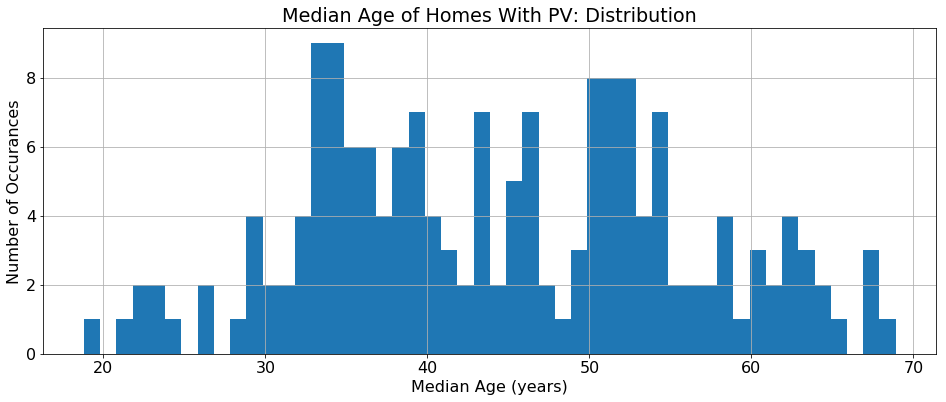

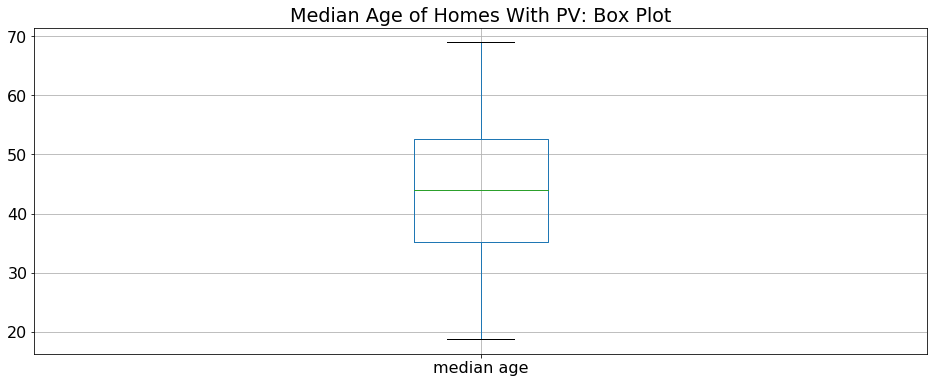

In [1021]:
# age distribution 
full_dataset['median age'].hist(bins=50)
plt.xlabel('Median Age (years)')
plt.ylabel('Number of Occurances')
plt.title('Median Age of Homes With PV: Distribution')
plt.savefig('median age distribution.png')
plt.show()

full_dataset.boxplot(column = 'median age')
plt.title('Median Age of Homes With PV: Box Plot')
matplotlib.rcParams.update({'font.size': 16})
plt.savefig('median age box plot.png')
plt.show()


In [1022]:
# sorting data by mean income
income_sort = full_dataset.sort_values(by=['household mean income'])
# income_sort

# analyze stats
summary_income = pd.Series(full_dataset['household mean income'])
summary_income.describe()

count       170.000000
mean      72076.435294
std       39504.379721
min       24256.000000
25%       48093.750000
50%       59672.500000
75%       79176.000000
max      252925.000000
Name: household mean income, dtype: float64

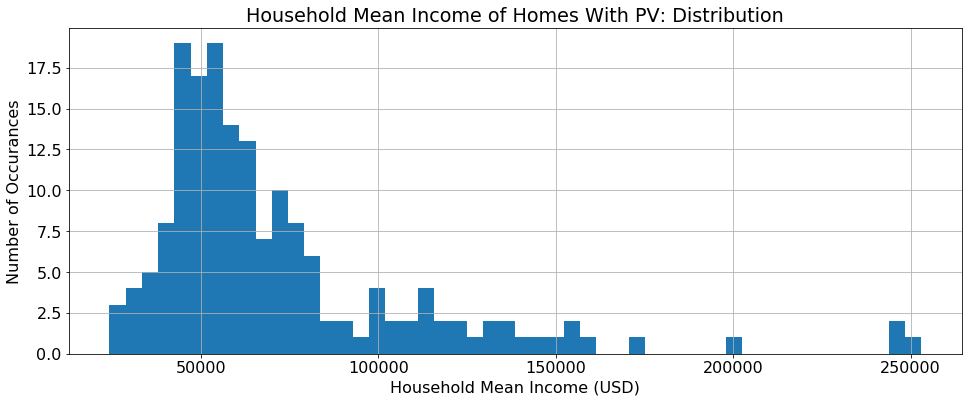

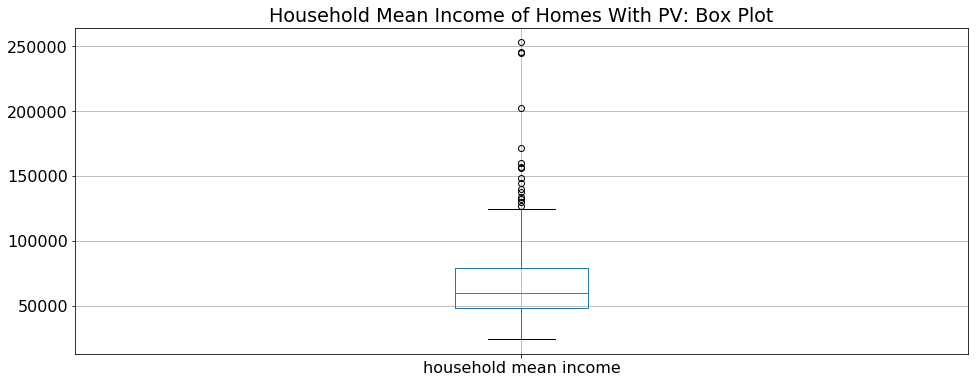

In [1023]:
# mean income distribution 
full_dataset['household mean income'].hist(bins=50)
plt.xlabel('Household Mean Income (USD)')
plt.ylabel('Number of Occurances')
plt.title('Household Mean Income of Homes With PV: Distribution')
plt.savefig('household income distribution.png')
plt.show()

full_dataset.boxplot(column = 'household mean income')
plt.title('Household Mean Income of Homes With PV: Box Plot')
plt.savefig('household income boxplot.png')
plt.show()

In [1024]:
# sorting data by median income
income_sort_med = full_dataset.sort_values(by=['household median income'])
#income_sort_med

# analyze stats
summary_income = pd.Series(full_dataset['household median income'])
summary_income.describe()

count       170.000000
mean      56172.152941
std       30776.079504
min       14758.000000
25%       36016.000000
50%       45921.500000
75%       66317.750000
max      202563.000000
Name: household median income, dtype: float64

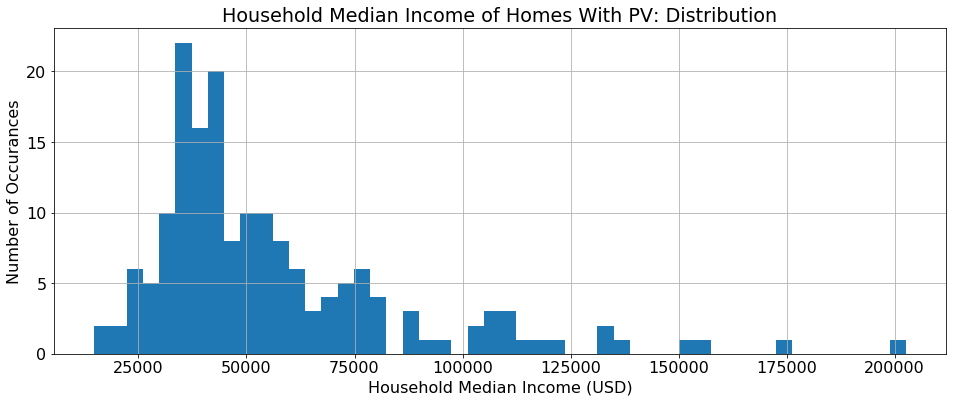

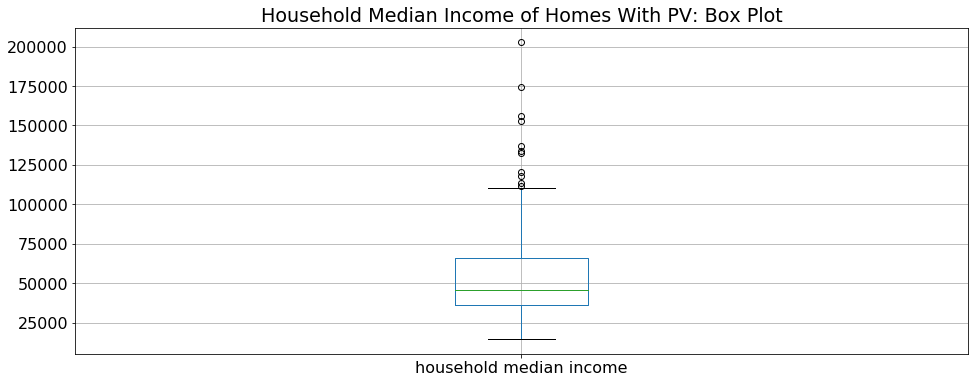

In [1025]:
# median income distribution 
full_dataset['household median income'].hist(bins=50)
plt.xlabel('Household Median Income (USD)')
plt.ylabel('Number of Occurances')
plt.title('Household Median Income of Homes With PV: Distribution')
plt.savefig('household median income distribution.png')
plt.show()

full_dataset.boxplot(column = 'household median income')
plt.title('Household Median Income of Homes With PV: Box Plot')
plt.savefig('household median income boxplot.png')
plt.show()

In [1026]:
# sorting data by system size
size_sort = full_dataset.sort_values(by=['size_kw'])
# size_sort

# analyze stats
summary_size = pd.Series(full_dataset['size_kw'])
summary_size.describe()

count    170.000000
mean      20.457470
std       14.516834
min        1.837000
25%        8.005000
50%       16.885417
75%       33.365469
max       49.690800
Name: size_kw, dtype: float64

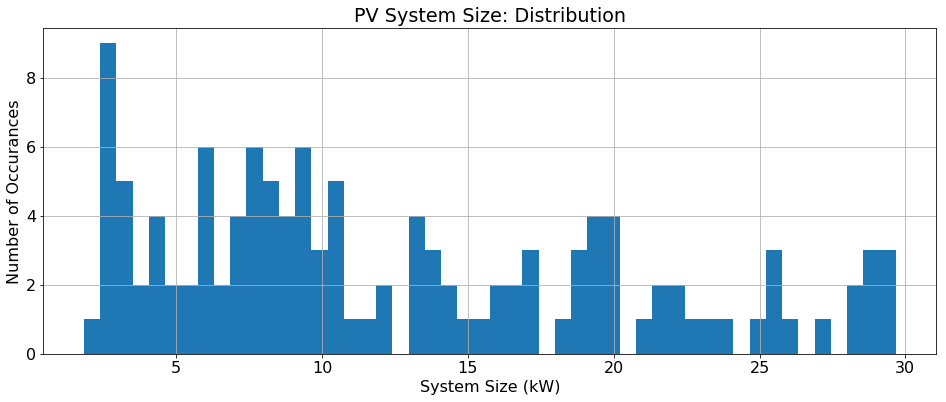

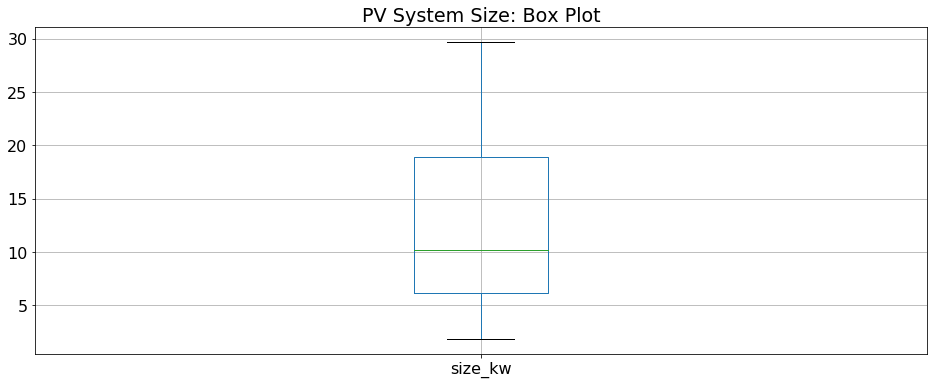

In [1027]:
# system size distribution 
trunc_sizekw = full_dataset[~(full_dataset['size_kw'] >= 30)]
trunc_sizekw['size_kw'].hist(bins=50)
plt.xlabel('System Size (kW)')
plt.ylabel('Number of Occurances')
plt.title('PV System Size: Distribution')
plt.savefig('system size distribution.png')
plt.show()

trunc_sizekw.boxplot(column = 'size_kw')
plt.title('PV System Size: Box Plot')
plt.savefig('system size boxplot')
plt.show()

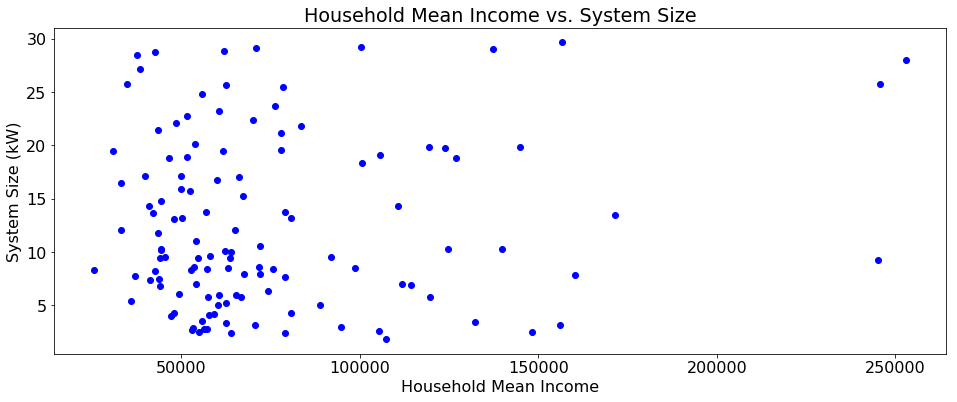

r squared =  0.012748866127991958
correlation =  0.1129108769250862


In [1028]:
# calculating correlation between income and system size
corr1 = trunc_sizekw['household mean income'].corr(trunc_sizekw['size_kw'])

# plot correlation between income and system size
x = trunc_sizekw['household mean income']
y = trunc_sizekw['size_kw']

q = np.polyfit(x,y,1)
p = np.poly1d(q)
fit = p(x)

c_y = [np.min(fit),np.max(fit)]
c_x = [np.min(x),np.max(x)]
 
plt.plot(x,y,'bo',label='Data')
#plt.plot(c_x,c_y,'r-',label='LS Regression')
plt.xlabel('Household Mean Income')
plt.ylabel('System Size (kW)')
plt.title('Household Mean Income vs. System Size')
plt.savefig('income vs system size scatter.png')
plt.show()

slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print("r squared = ", r_value**2)
print("correlation = ", corr1)

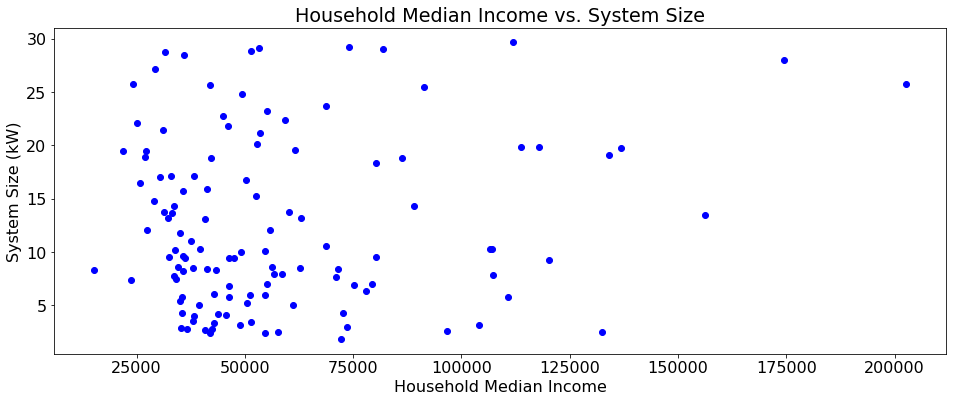

r squared =  0.019152397302636112
correlation =  0.1383921865664247


In [1029]:
# calculating correlation between median income and system size
corr1 = trunc_sizekw['household median income'].corr(trunc_sizekw['size_kw'])

# plot correlation between income and system size
x = trunc_sizekw['household median income']
y = trunc_sizekw['size_kw']

q = np.polyfit(x,y,1)
p = np.poly1d(q)
fit = p(x)

c_y = [np.min(fit),np.max(fit)]
c_x = [np.min(x),np.max(x)]
 
plt.plot(x,y,'bo',label='Data')
#plt.plot(c_x,c_y,'r-',label='LS Regression')
plt.xlabel('Household Median Income')
plt.ylabel('System Size (kW)')
plt.title('Household Median Income vs. System Size')
plt.savefig('median income vs system size scatter.png')
plt.show()

slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print("r squared = ", r_value**2)
print("correlation = ", corr1)

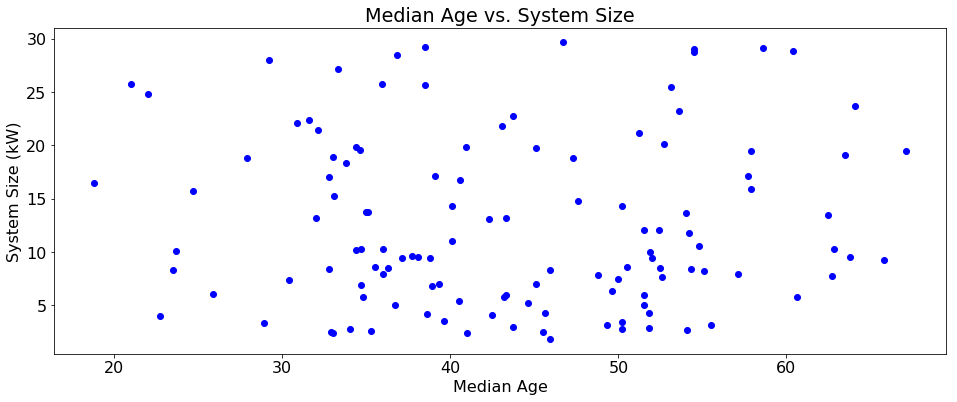

r squared =  0.0001297493123395898
correlation =  -0.011390755564912706


In [1030]:
# calculating correlation between median age and system size
corr2 = trunc_sizekw['size_kw'].corr(trunc_sizekw['median age'])

# plot correlation between income and system size
w = trunc_sizekw['median age']
y = trunc_sizekw['size_kw']

q = np.polyfit(w,y,1)
p = np.poly1d(q)
fit = p(w)

c_y = [np.min(fit),np.max(fit)]
c_w = [np.min(w),np.max(w)]
 
plt.plot(w,y,'bo',label='Data')
#plt.plot(c_w,c_y,'r-',label='LS Regression')
plt.xlabel('Median Age')
plt.ylabel('System Size (kW)')
plt.title('Median Age vs. System Size')
plt.savefig('age vs system size scatter.png')
plt.show()

slope, intercept, r_value, p_value, std_err = stats.linregress(w,y)
print("r squared = ", r_value**2)
print("correlation = ", corr2)

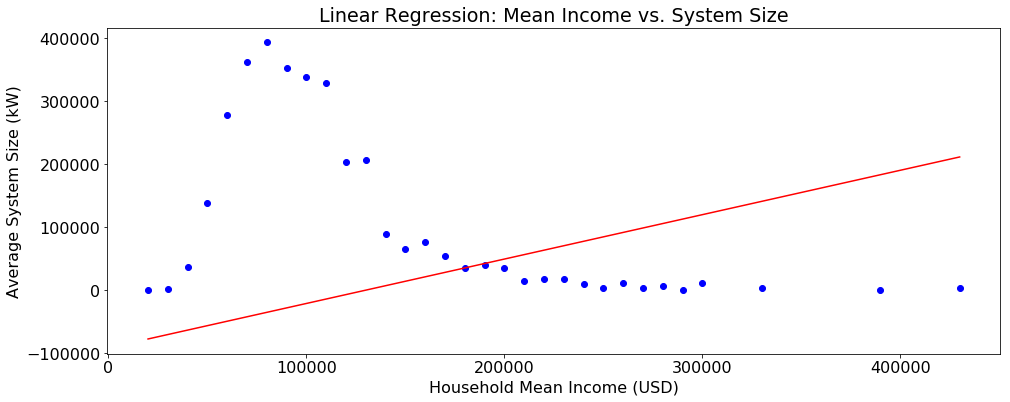

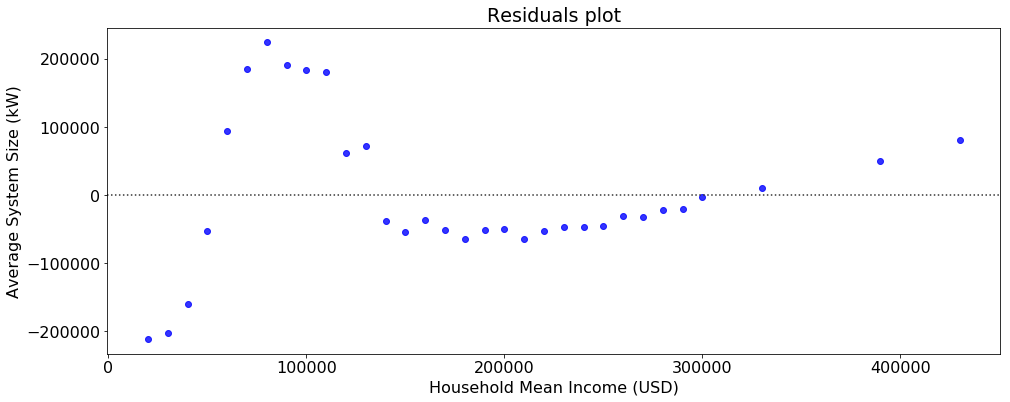

r squared =  0.32060854436479824
correlation =  -0.5662230517780058
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.321
Model:                            OLS   Adj. R-squared:                  0.298
Method:                 Least Squares   F-statistic:                     14.16
Date:                Fri, 01 Jun 2018   Prob (F-statistic):           0.000730
Time:                        16:29:58   Log-Likelihood:                -415.79
No. Observations:                  32   AIC:                             835.6
Df Residuals:                      30   BIC:                             838.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------

,household mean income,size_kw
count,32.000000,32.000000
mean,180937.500000,97923.335995
std,105290.975473,131087.314221
min,20000.000000,96.827100
25%,97500.000000,5737.532493
50%,175000.000000,34825.973193
75%,252500.000000,154049.072884
max,430000.000000,393190.262226


In [1047]:
# normalizing data points via averaging per income bracket: income and system size
acs_dataset = pd.merge(income, age, on='zipcode')
untrunc_dataset = pd.merge(left = acs_dataset, right = clean_pv3[~(clean_pv3['size_kw'] >= 1000)], 
                           left_on='zipcode', right_on='zipcode')
untrunc_dataset = untrunc_dataset.round({"household mean income": -4})

# averaging system size (kw) in each income range 
untrunc_dataset = untrunc_dataset.groupby('household mean income',as_index=False).agg({"size_kw":"sum"})

# calculating correlation between income and system size
corr3 = untrunc_dataset['household mean income'].corr(untrunc_dataset['size_kw'])

# plot correlation between income and system size
x = untrunc_dataset['household mean income']
y = untrunc_dataset['size_kw']

q = np.polyfit(x,y,1)
p = np.poly1d(q)
fit = p(x)

c_y = [np.min(fit),np.max(fit)]
c_x = [np.min(x),np.max(x)]
 
plt.plot(x,y,'bo')
plt.plot(c_x,c_y,'r-')
plt.xlabel('Household Mean Income (USD)')
plt.ylabel('Average System Size (kW)')
plt.title('Linear Regression: Mean Income vs. System Size')
plt.savefig('income vs system size regression MEAN.png')
plt.show()

import seaborn as sns

# residuals plot
sns.residplot(x, y, lowess=False, color="b")
plt.title('Residuals plot')
plt.xlabel('Household Mean Income (USD)')
plt.ylabel('Average System Size (kW)')
plt.savefig('mean income vs system size residuals.png')
plt.show()

slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print("r squared = ", r_value**2)
print("correlation = ", corr3)

model1 = ols("y ~ x", untrunc_dataset).fit()
print(model1.summary())

untrunc_dataset.describe()

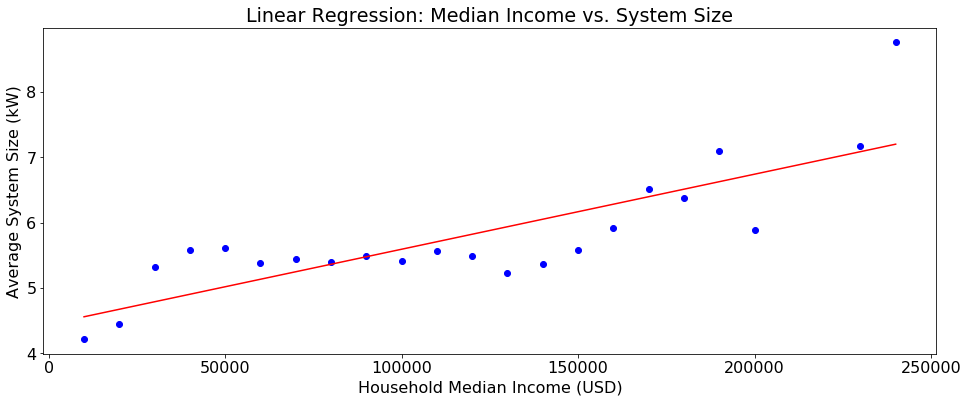

r squared =  0.32060854436479824
correlation =  0.13960466841469377
                            OLS Regression Results                            
Dep. Variable:                      g   R-squared:                       0.668
Model:                            OLS   Adj. R-squared:                  0.652
Method:                 Least Squares   F-statistic:                     40.27
Date:                Fri, 01 Jun 2018   Prob (F-statistic):           3.42e-06
Time:                        16:48:23   Log-Likelihood:                -17.577
No. Observations:                  22   AIC:                             39.15
Df Residuals:                      20   BIC:                             41.34
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------

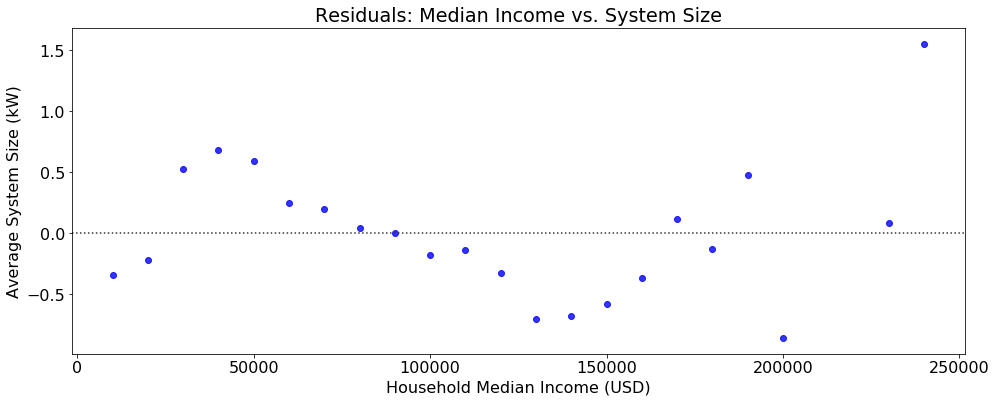

r squared =  0.6681404337083396
correlation =  0.8173985770163413


In [1075]:
# normalizing data points via averaging per income bracket: median income and system size
acs_dataset = pd.merge(income_med, age, on='zipcode')
untrunc_dataset = pd.merge(left = acs_dataset, right = clean_pv3[~(clean_pv3['size_kw'] >= 1000)], 
                           left_on='zipcode', right_on='zipcode')
untrunc_dataset = untrunc_dataset.round({"household median income": -4})

# averaging system size (kw) in each income range 
untrunc_dataset = untrunc_dataset.groupby('household median income',as_index=False).agg({"size_kw":"mean"})

# calculating correlation between income and system size
corr3 = untrunc_dataset['household median income'].corr(untrunc_dataset['size_kw'])

# plot correlation between income and system size
f = untrunc_dataset['household median income']
g = untrunc_dataset['size_kw']

q = np.polyfit(f,g,1)
p = np.poly1d(q)
fit = p(f)

c_g = [np.min(fit),np.max(fit)]
c_f = [np.min(f),np.max(f)]
 
plt.plot(f,g,'bo')
plt.plot(c_f,c_g,'r-')
plt.xlabel('Household Median Income (USD)')
plt.ylabel('Average System Size (kW)')
plt.title('Linear Regression: Median Income vs. System Size')
plt.savefig('income vs system size regression MEDIAN.png')
plt.show()

slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print("r squared = ", r_value**2)
print("correlation = ", corr4)

model2 = ols("g ~ f", untrunc_dataset).fit()
print(model2.summary())

# residuals plot
sns.residplot(f,g, lowess=False, color="b")
plt.title('Residuals: Median Income vs. System Size')
plt.xlabel('Household Median Income (USD)')
plt.ylabel('Average System Size (kW)')
plt.savefig('median income vs system size residuals.png')
plt.show()

slope, intercept, r_value, p_value, std_err = stats.linregress(f,g)
print("r squared = ", r_value**2)
print("correlation = ", corr3)



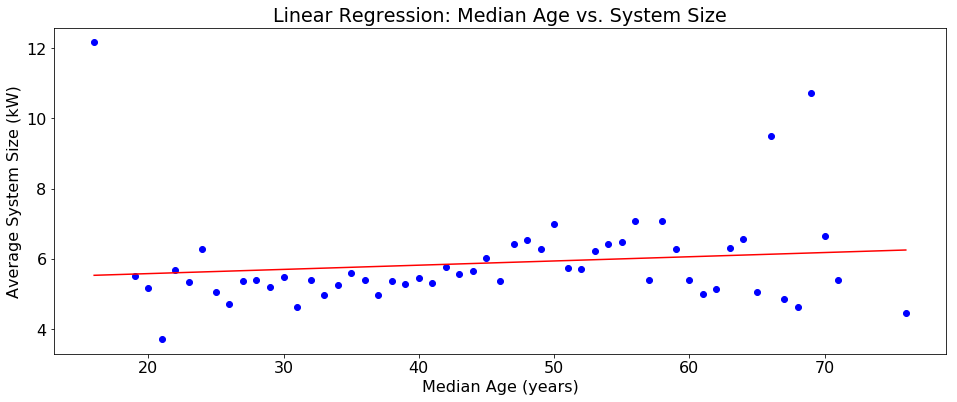

r squared =  0.0194894634431766
correlation =  0.13960466841469377
                            OLS Regression Results                            
Dep. Variable:                      r   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.053
Date:                Fri, 01 Jun 2018   Prob (F-statistic):              0.309
Time:                        16:31:52   Log-Likelihood:                -95.298
No. Observations:                  55   AIC:                             194.6
Df Residuals:                      53   BIC:                             198.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------

In [1051]:
# normalizing data points via averaging per age bracket: age and system size
acs_dataset = pd.merge(income, age, on='zipcode')
untrunc_dataset1 = pd.merge(left = acs_dataset, right = clean_pv3[~(clean_pv3['size_kw'] >= 1000)], left_on='zipcode', right_on='zipcode')
untrunc_dataset1 = untrunc_dataset1.round({"median age": 0})

# averaging system size (kw) in each income range 
untrunc_dataset1 = untrunc_dataset1.groupby('median age',as_index=False).agg({"size_kw":"mean"})

# calculating correlation between income and system size
corr4 = untrunc_dataset1['median age'].corr(untrunc_dataset1['size_kw'])

# plot correlation between income and system size
q = untrunc_dataset1['median age']
r = untrunc_dataset1['size_kw']

 
plt.plot(q,r,'bo')
plt.plot(np.unique(q), np.poly1d(np.polyfit(q,r, 1))(np.unique(q)),'r-')
plt.xlabel('Median Age (years)')
plt.ylabel('Average System Size (kW)')
plt.title('Linear Regression: Median Age vs. System Size')
plt.savefig('age vs system size regression MEAN.png')
plt.show()

slope, intercept, r_value, p_value, std_err = stats.linregress(q,r)
print("r squared = ", r_value**2)
print("correlation = ", corr4)

model2 = ols("r ~ q", untrunc_dataset1).fit()
print(model2.summary())

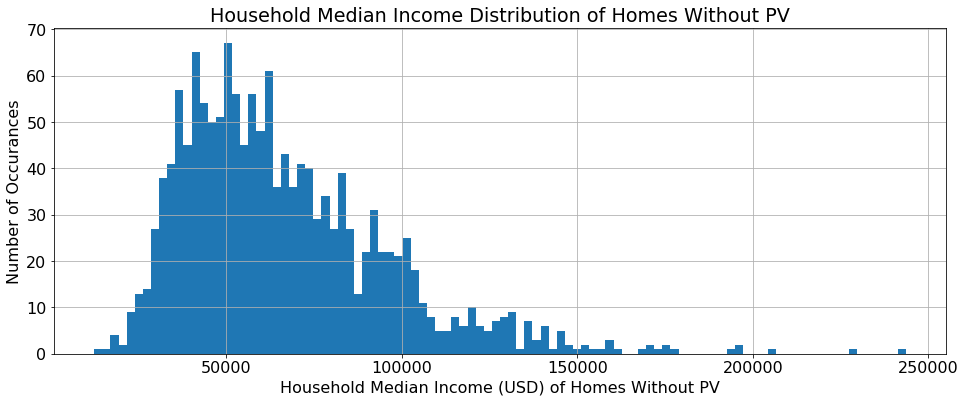

In [1035]:
# higher correlation between system size and median income level - find zipcodes that appear on age/income data but not on pv data
frames = [pv_trunc, income_med]
from functools import reduce
joined_data = reduce(lambda  left,right: pd.merge(left,right,on=['zipcode'], how='outer'), frames).fillna(0)
no_pv = joined_data.loc[joined_data['size_kw'] == 0]

no_pv['household median income'].hist(bins=100)
plt.xlabel('Household Median Income (USD) of Homes Without PV')
plt.ylabel('Number of Occurances')
plt.title('Household Median Income Distribution of Homes Without PV')
plt.savefig('income of houses wout solar distribution.png')
plt.show()


In [1053]:
# sorting income values into ranges
predict_pv = no_pv.round({"household median income": -4})
predict_pv['predicted size_kw'] = (4.4434 + (0.00001148*(predict_pv['household median income'])))
#predict_pv.head(10)

In [1037]:
#importing zipcode/latitude/longitude data for CA
zip_countydata = pd.read_csv('Datasets/CA zip codes.csv', usecols = ['zip_code','latitude','longitude','state','county']) 
zip_county = zip_countydata[zip_countydata['state'].str.contains("CA")]
zip_county.columns = ['zipcode','latitude','longitude','state','county']
#zip_county = zip_county.set_index(full_dataset.index)
#zip_county

# merge datasets
data_county = pd.merge(joined_data, zip_county, on='zipcode')

In [1115]:
# finding counties that should install solar
# closest correlation between $80,000-140,000 from linear regression/residuals plot for income vs. system size

zero_pv = data_county.loc[data_county['size_kw'] == 0]
recommend_pv = zero_pv.loc[(zero_pv['household median income'] >= 50000) & (zero_pv['household median income'] <= 120000)]
recommend_pv.to_csv('recommended_pv6.csv')
zero_pv['predicted size_kw'] = (4.4434 + (0.00001148*(zero_pv['household median income'])))
recommend_pv

,zipcode,size_kw,household median income,latitude,longitude,state,county
403,90024,0.0,57210.0,33.786594,-118.298662,CA,Los Angeles
404,90025,0.0,72653.0,33.786594,-118.298662,CA,Los Angeles
405,90026,0.0,51568.0,33.786594,-118.298662,CA,Los Angeles
406,90027,0.0,52922.0,33.786594,-118.298662,CA,Los Angeles
412,90034,0.0,60965.0,33.786594,-118.298662,CA,Los Angeles
413,90035,0.0,74667.0,33.786594,-118.298662,CA,Los Angeles
414,90036,0.0,71917.0,33.786594,-118.298662,CA,Los Angeles
417,90039,0.0,77361.0,33.786594,-118.298662,CA,Los Angeles
419,90041,0.0,68457.0,33.786594,-118.298662,CA,Los Angeles
420,90042,0.0,51444.0,33.786594,-118.298662,CA,Los Angeles


In [1058]:
from mpl_toolkits.basemap import Basemap

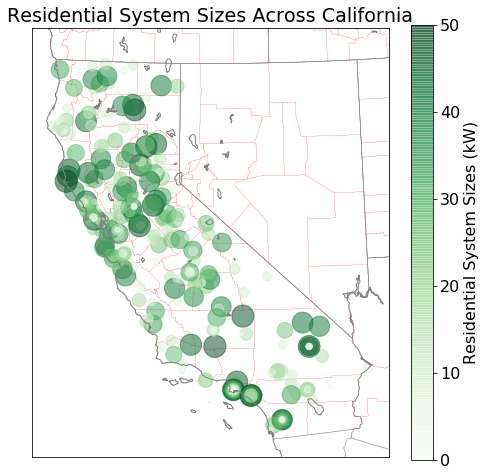

In [1061]:
## REFERENCE: https://jakevdp.github.io/PythonDataScienceHandbook/04.13-geographic-data-with-basemap.html

lat = data_county['latitude'].values
lon = data_county['longitude'].values
size = data_county['size_kw'].values

# 1. Draw the map background
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='lcc', resolution='h', 
            lat_0=37.5, lon_0=-119,
            width=1E6, height=1.2E6)
m.drawcoastlines(color='gray')
m.drawcountries(color='gray')
m.drawstates(color='gray')
m.drawcounties(color='red')

# 2. scatter city data, with color reflecting population
# and size reflecting area
m.scatter(lon, lat, latlon=True,
          c=size, s=10*size,
          cmap='Greens', alpha=0.5)

# 3. create colorbar and legend
plt.colorbar(label=r'Residential System Sizes (kW)')
plt.clim(0, 50)
plt.title('Residential System Sizes Across California')
plt.savefig('residential map ca.png')

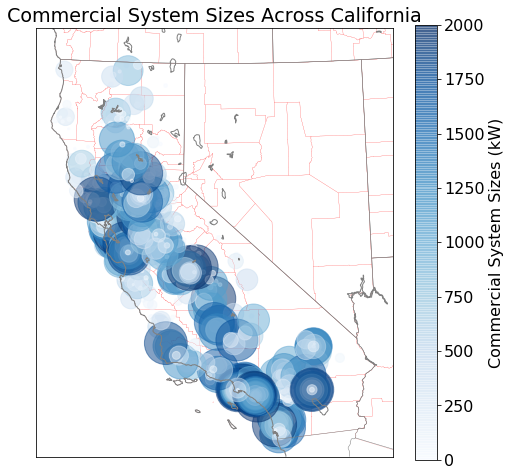

In [1041]:
## REFERENCE: https://jakevdp.github.io/PythonDataScienceHandbook/04.13-geographic-data-with-basemap.html

clean_pvCOM = clean_pv1[clean_pv1['install_type'].str.contains("ommercial")]
pv_sum = clean_pvCOM.groupby('zipcode',as_index=False).agg({"size_kw":"sum"})
pv_truncd = pv_sum[~(pv_sum['size_kw'] >= 2000)]
data_county_all = pd.merge(pv_truncd, zip_county, on='zipcode')


clean_pv3 = clean_pv2.replace({'Residential':'residential'})

lat = data_county_all['latitude'].values
lon = data_county_all['longitude'].values
size = data_county_all['size_kw'].values

# 1. Draw the map background
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='lcc', resolution='h', 
            lat_0=37.5, lon_0=-119,
            width=1E6, height=1.2E6)
m.drawcoastlines(color='gray')
m.drawcountries(color='gray')
m.drawstates(color='gray')
m.drawcounties(color='red')

# 2. scatter city data, with color reflecting population
# and size reflecting area
m.scatter(lon, lat, latlon=True,
          c=size, s=size,
          cmap='Blues', alpha=0.5)

# 3. create colorbar and legend
plt.colorbar(label=r'Commercial System Sizes (kW)')
plt.clim(0, 2000)
plt.title('Commercial System Sizes Across California')
plt.savefig('commercial map ca.png')

In [1102]:
# importing dataset with average DNI per county, summing system size in each county
dni_data = pd.read_csv('Datasets/DNI data.csv', usecols = ['County','Area','Average DNI']) 
dni_data.columns = ['county','area','average DNI']

county_sum = data_county.groupby('county',as_index=False).agg({"size_kw":"sum"})
zip_county_sum =  pd.merge(dni_data, county_sum, on='county')
merge1_recommend_pv = pd.merge(zip_county_sum, recommend_pv, on='county')
merge_recommend_pv = pd.merge(merge1_recommend_pv, zero_pv, on='county')
merge_recommend_pv.to_csv('recommended_dni.csv')
sum_recommend = sum(merge_recommend_pv['size_kw_x'])

#recommend_pv = zero_pv.loc[(zero_pv['household median income'] >= 60000) & (zero_pv['household median income'] <= 120000)]


merge_recommend_pv1 = merge_recommend_pv.loc[(merge_recommend_pv['household median income_y'] >= 50000) & (merge_recommend_pv['household median income_y'] <= 120000)]



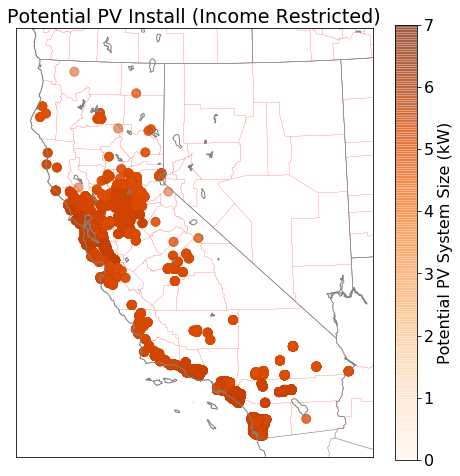

In [1103]:
## REFERENCE: https://jakevdp.github.io/PythonDataScienceHandbook/04.13-geographic-data-with-basemap.html

lat = merge_recommend_pv1['latitude_x'].values
lon = merge_recommend_pv1['longitude_x'].values
size = merge_recommend_pv1['predicted size_kw'].values

#drawing map
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='lcc', resolution='h', 
            lat_0=37.5, lon_0=-119,
            width=1E6, height=1.2E6)
m.drawcoastlines(color='gray')
m.drawcountries(color='gray')
m.drawstates(color='gray')
m.drawcounties(color='red')

#scatter plot of system size data
m.scatter(lon, lat, latlon=True,
          c=size, s=15*size,
          cmap='Oranges', alpha=0.5)

#colorbar
plt.colorbar(label=r'Potential PV System Size (kW)')
plt.clim(0, 7)
plt.title('Potential PV Install (Income Restricted)')
plt.savefig('potential map income.png')

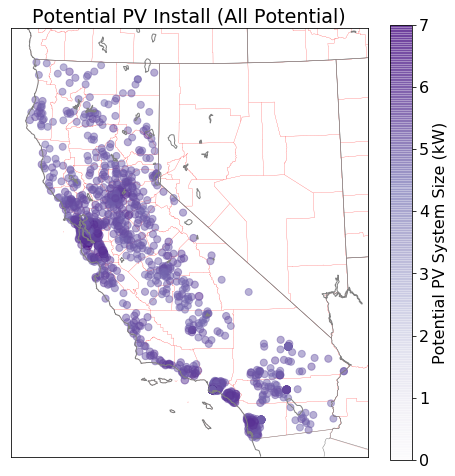

In [1100]:
## REFERENCE: https://jakevdp.github.io/PythonDataScienceHandbook/04.13-geographic-data-with-basemap.html

lat = zero_pv['latitude'].values
lon = zero_pv['longitude'].values
size = zero_pv['predicted size_kw'].values

#drawing map
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='lcc', resolution='h', 
            lat_0=37.5, lon_0=-119,
            width=1E6, height=1.2E6)
m.drawcoastlines(color='gray')
m.drawcountries(color='gray')
m.drawstates(color='gray')
m.drawcounties(color='red')

#scatter plot of system size data
m.scatter(lon, lat, latlon=True,
          c=size, s=10*size,
          cmap='Purples', alpha=0.5)

#colorbar
plt.colorbar(label=r'Potential PV System Size (kW)')
plt.clim(0, 7)
plt.title('Potential PV Install (All Potential)')
plt.savefig('potential map all.png')

In [1111]:
income_all = pd.read_csv('Datasets/ACS Income 2016.csv', usecols = ['GEO.id2','HC01_EST_VC13','HC01_EST_VC15'])
for col in income_all:
    income_all[col] = pd.to_numeric(income_all[col], errors='coerce')
income_all.columns = ['zipcode','household median income','household mean income']
income_all = income_all.dropna(axis=0, how='any')

restr_clean_pv3 = clean_pv3[~(clean_pv3['size_kw'] >= 100)]
pvsum = restr_clean_pv3.groupby('zipcode',as_index=False).agg({"size_kw":"sum"})

frames = [pvsum, income_all]
from functools import reduce
joined_data1 = reduce(lambda  left,right: pd.merge(left,right,on=['zipcode'], how='outer'), frames).fillna(0)
data_county1 = pd.merge(joined_data1, zip_county, on='zipcode')
total_info = pd.merge(data_county1, dni_data, on='county')
total_info['predicted size_kw'] = np.where(total_info['size_kw']==0,(4.4434 + (0.00001148*(total_info['household median income']))),0)
total_info
#total_info.groupby('county',as_index=False).agg({"size_kw":"mean"})
#total_info.groupby(['county'])['size_kw'].agg('sum')
#total_info.groupby('county').apply(lambda x: x.mean())
#total_info['total size kw'] = total_info.groupby(['county'])['size_kw'].transform('sum')
total_sum1 = total_info.groupby('county',as_index=False).agg({"average DNI":"mean"})
total_sum2 = total_info.groupby('county',as_index=False).agg({"size_kw":"sum"})
total_sum3 = total_info.groupby('county',as_index=False).agg({"predicted size_kw":"sum"})
total_sum4 = total_info.groupby('county',as_index=False).agg({"household median income":"mean"})
total_sum5 = total_info.groupby('county',as_index=False).agg({"household mean income":"mean"})

frames1 = [total_sum1, total_sum2, total_sum3, total_sum4, total_sum5]
compiled_data_county = reduce(lambda  left,right: pd.merge(left,right,on=['county'], how='outer'), frames1).fillna(0)
total_info.describe()
## need to sum system size at zipcode level first, then bring into this table and sum for total size per county

,zipcode,size_kw,household median income,household mean income,latitude,longitude,area,average DNI,predicted size_kw
count,1868.000000,1868.000000,1868.000000,1868.000000,1860.000000,1860.000000,1868.000000,1868.000000,1868.000000
mean,93606.345824,1621.357831,56027.669700,73771.188437,36.287348,-119.806730,3859.213233,5.085424,0.345592
std,1796.849138,2660.388507,35867.272134,48919.001503,2.437085,2.238035,4315.323816,0.651438,1.271359
min,90001.000000,0.000000,0.000000,0.000000,32.566356,-124.268790,47.180000,3.984014,0.000000
25%,92239.750000,37.886583,35858.500000,48159.250000,33.786594,-121.768501,1042.650000,4.413085,0.000000
50%,93626.500000,488.116100,53397.500000,69637.500000,36.599919,-120.008704,3314.590000,5.055740,0.000000
75%,95334.500000,2062.763975,76183.500000,97834.250000,38.190602,-118.234436,4238.560000,5.811493,0.000000
max,96161.000000,24613.486800,243542.000000,432416.000000,41.939792,-114.210609,20106.030000,5.896361,6.281715


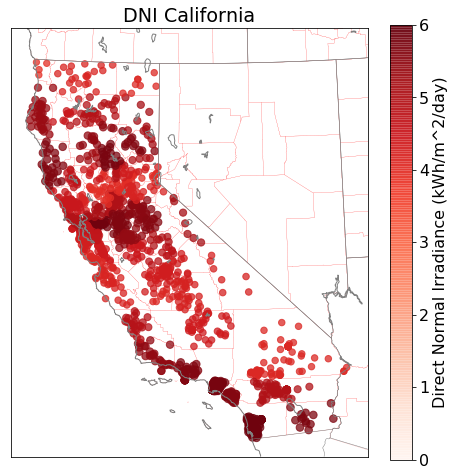

In [1104]:
## DNI

lat = total_info['latitude'].values
lon = total_info['longitude'].values
size = total_info['average DNI'].values

#drawing map
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='lcc', resolution='h', 
            lat_0=37.5, lon_0=-119,
            width=1E6, height=1.2E6)
m.drawcoastlines(color='gray')
m.drawcountries(color='gray')
m.drawstates(color='gray')
m.drawcounties(color='red')

#scatter plot of system size data
m.scatter(lon, lat, latlon=True,
          c=size, s=10*size,
          cmap='Reds', alpha=0.75)

#colorbar
plt.colorbar(label=r'Direct Normal Irradiance (kWh/m^2/day)')
plt.clim(0, 6)
plt.title('DNI California')
plt.savefig('dni calif.png')

In [1122]:
recommend_wdni = pd.merge(dni_data, zero_pv, on='county')
restrict_recommenddni = recommend_wdni.loc[(recommend_wdni['average DNI'] >= 5) & (recommend_wdni['average DNI'] <= 6)]
restrict_recommenddni
#restrict_recommenddni.to_csv('recommended_DNIonly.csv')


,county,area,average DNI,zipcode,size_kw,household median income,latitude,longitude,state,predicted size_kw
50,Lassen,4720.38,5.213399,96109,0.0,34464.0,39.962841,-120.202470,CA,4.839047
51,Lassen,4720.38,5.213399,96113,0.0,46042.0,40.101514,-120.244727,CA,4.971962
52,Lassen,4720.38,5.213399,96114,0.0,70806.0,40.298255,-120.506184,CA,5.256253
53,Lassen,4720.38,5.213399,96117,0.0,31118.0,40.407309,-120.409210,CA,4.800635
54,Lassen,4720.38,5.213399,96121,0.0,125375.0,40.196745,-120.367586,CA,5.882705
55,Lassen,4720.38,5.213399,96123,0.0,33333.0,40.776154,-120.326259,CA,4.826063
56,Lassen,4720.38,5.213399,96128,0.0,64063.0,40.341664,-120.423118,CA,5.178843
57,Lassen,4720.38,5.213399,96130,0.0,52459.0,40.548881,-120.719159,CA,5.045629
58,Lassen,4720.38,5.213399,96132,0.0,40000.0,40.950868,-120.612954,CA,4.902600
59,Lassen,4720.38,5.213399,96137,0.0,44627.0,40.303792,-121.022584,CA,4.955718
